In [1]:
%pylab inline

import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('../log/memoryLog.csv', comment='#')
data

,agent,time,news0,news1
0,0.0,1.0,0bb3a62c1bb072ec,0
1,1.0,1.0,0ec2b0c3c743962c,0
2,2.0,1.0,fccead0eed45be3e,0
3,3.0,1.0,0.0,0.0
4,4.0,1.0,0.0,0.0
5,5.0,1.0,0.0,0.0
6,6.0,1.0,0.0,0.0
7,7.0,1.0,0.0,0.0
8,8.0,1.0,0.0,0.0
9,9.0,1.0,0.0,0.0


In [3]:
maxTimeIteration = data.max()['time']
maxTimeIteration

50.0

In [4]:
maxUsers = data.max()['agent']
maxUsers

102.0

In [5]:
cuttedData = data.drop('agent', 1)
lt = list(cuttedData)
lt

['time', 'news0', 'news1']

In [6]:
listNews = []
ln = lt[1:]
for i in range(len(ln)):
    listNews = append(listNews, data.groupby(ln[i]).nunique().index.tolist()) #counts all news
listNews = list(set(listNews)) # removes duplicates
listNews

['0.0', 'fccead0eed45be3e', '0', '0ec2b0c3c743962c', '0bb3a62c1bb072ec']

CPU times: user 24.3 s, sys: 919 ms, total: 25.2 s
Wall time: 24.5 s


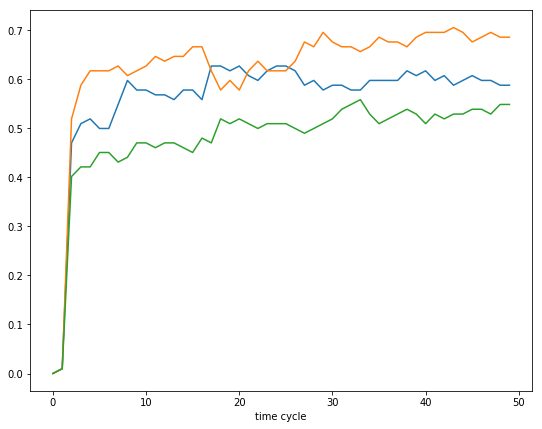

In [29]:
%%time
for ii, news in enumerate(listNews):
    if news == str(0) or news == str(0.0):
        continue
    arr = np.empty([0])
    for time in range(int(maxTimeIteration)):
        cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  time]
        counter = 0
        for index, row in cuttedSingleData.iterrows():
            if (row[ln] == news).any():
                counter = counter + 1
        arr = np.append(arr, counter)
    arr = arr / maxUsers
    xlabel('time cycle')
    ylabel('')
    figsize(9,7)
    plot(arr, label='News %s' % ii)
    savefig('memoryplot.pdf')
    #legend(loc='lower right')

Using Pandas' *"Exponential Weighted Moving Average"* function: `ewm`

CPU times: user 21.4 s, sys: 974 ms, total: 22.4 s
Wall time: 21.6 s


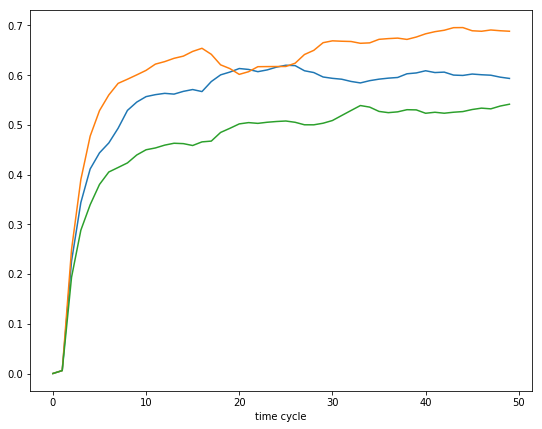

In [28]:
%%time
for ii, news in enumerate(listNews):
    if news == str(0) or news == str(0.0):
        continue
    arr = np.empty([0])
    for time in range(int(maxTimeIteration)):
        cuttedSingleData = cuttedData.loc[cuttedData['time'] ==  time]
        counter = 0
        for index, row in cuttedSingleData.iterrows():
            if (row[ln] == news).any():
                counter = counter + 1
        arr = np.append(arr, counter)
    arr = arr / maxUsers
    parr = pd.Series(arr)
    parr = parr.ewm(span=int(maxTimeIteration)/10).mean()
    arr = parr.values
    xlabel('time cycle')
    ylabel('')
    figsize(9,7)
    plot(arr, label='News %s' % ii)
    savefig('memoryplot.pdf')
    #legend(loc='lower right')